# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Juliano Zhu  

Student ID: 1003976502

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [10]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? _30_
* How many observations have a 'mean area' of greater than 700? _171_
* How many participants tested `Malignant`? _212_
* How many participants tested `Benign`? _357_

In [11]:
import pandas as pd
import numpy as np
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df["target"] = dataset.target

#How many features do we have in this dataset? 
num_feature = len(dataset['feature_names'])
print(num_feature)
#How many observations have a 'mean area' of greater than 700? 
num_700 = np.sum(df["mean area"] > 700)
print(num_700)
#How many participants tested Malignant? 
Malignant = np.sum(df["target"] == 0)
print(Malignant)
#How many participants tested Benign?
Benign = np.sum(df["target"] == 1)
print(Benign)

df.head()

30
171
212
357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [12]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,"mean radius":"worst fractal dimension"], df["target"], test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




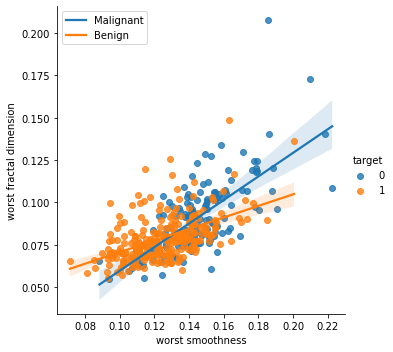

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x = "worst smoothness", y = "worst fractal dimension" , hue='target', data = X_train.join(y_train))
plt.legend(labels = ['Malignant', 'Benign'])
plt.show()


In [14]:
#with standardization
mu1,si1 = X_train['worst smoothness'].mean(), X_train['worst smoothness'].std() 
standard1 = (X_train['worst smoothness'] - mu1)/si1
X_train['worst smoothness standard'] = standard1

mu2,si2 = X_train['worst fractal dimension'].mean(), X_train['worst fractal dimension'].std() 
standard2 = (X_train['worst fractal dimension'] - mu2)/si2
X_train['worst fractal dimension standard'] = standard2



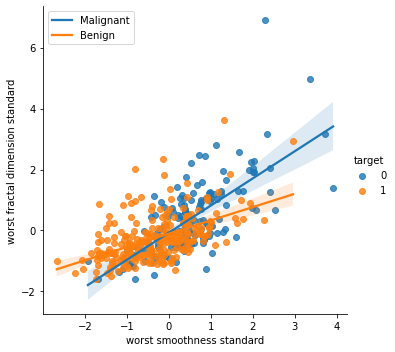

In [15]:
sns.lmplot(x = "worst smoothness standard", y = "worst fractal dimension standard" , hue='target', data = X_train.join(y_train))
plt.legend(labels = ['Malignant', 'Benign'])
plt.show()

We can see from the scale on the axis, the standardization will rescale the data to a common measurement and make them easy to compare and observe. It will not affect the data pattern, structure and distribution. But formatting data in a way that creates consistency across your systems and makes it easy for businesses to use.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




<function matplotlib.pyplot.show>

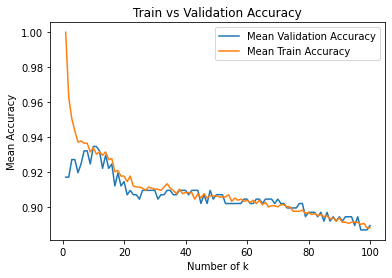

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,"mean radius":"worst fractal dimension"], df["target"], test_size=0.3, random_state=0)
#1. Train a KNN Classifier using cross-validation on the dataset. Sweep k (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs k.
valid_score_list = []
train_score_list = []

for k in range(1,101):
  knn_model = KNeighborsClassifier(n_neighbors = k)
  scores = cross_validate(knn_model, X_train, y_train, cv=5, return_train_score=True)
  Mean_Validation_Accuracy = scores['test_score'].mean()
  Mean_Train_Accuracy = scores['train_score'].mean()
  valid_score_list.append(Mean_Validation_Accuracy)
  train_score_list.append(Mean_Train_Accuracy)

plt.plot(range(1,101), valid_score_list, label = 'Mean Validation Accuracy')
plt.plot(range(1,101), train_score_list, label = 'Mean Train Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Number of k')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show 


In [17]:
#2. What is the best k? What is the highest cross-validation accuracy?
print("Best k is:", valid_score_list.index(max(valid_score_list))+1)
print("Highest cross-validation accuracy is:", max(valid_score_list))

Best k is: 10
Highest cross-validation accuracy is: 0.9346518987341772


3.Comment on which ranges of k lead to underfitted or overfitted models (hint: compare training and validation curves!).


From k = 1 to 9, the model is overfitting since the training score is much higher than the validation.

As k keep increasing, after k = 10, the model start to underfitting, since the training score is decreasing lower and lower.

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

In [25]:
from sklearn import tree

def Feature_selector (X_train , y_train , tr=0.95):
  X_train, X_test, y_train, y_test = train_test_split(df.loc[:,"mean radius":"worst fractal dimension"], df["target"], test_size=0.3, random_state=0)
  Full_Feature_cross_validation_accuracy = 0.9346518987341772
  valid_score_best = []
  k_best = []
  removed_features = []

  while True:
    dt = tree.DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    importance = dt.feature_importances_
    importance_min = abs(importance).min()
    indices = np.where(importance == importance_min)[0][0]
    removed_features.append(X_train.columns[indices])
    X_train = X_train.drop(X_train.columns[indices], axis = 1)
    print(importance)
    valid_score_list = []
    for k in range(1,51):
      knn_model = KNeighborsClassifier(n_neighbors = k)
      scores = cross_validate(knn_model, X_train, y_train, cv=5, return_train_score=True)
      Mean_Validation_Accuracy = scores['test_score'].mean()
      valid_score_list.append(Mean_Validation_Accuracy)

    valid_score_best.append(max(valid_score_list))
    k_best.append(valid_score_list.index(max(valid_score_list))+1)

    if len(X_train.columns) == 1:
      break
    elif max(valid_score_list) < tr*Full_Feature_cross_validation_accuracy:
      break

  return removed_features, valid_score_best, k_best

In [19]:
def number_feature_remain(removed_features):
  num_feature_remain = []
  feature_remain = 30
  for i in removed_features:
    feature_remain -= 1
    num_feature_remain.append(str(feature_remain))
  return num_feature_remain

In [20]:
removed_features1, valid_score_best1, k_best1 = Feature_selector (X_train , y_train , tr=0.95)
print(removed_features1)
print(valid_score_best1)
print(k_best1)

['mean radius', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean fractal dimension', 'mean texture', 'radius error', 'texture error', 'perimeter error', 'compactness error', 'smoothness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst smoothness', 'worst compactness', 'mean concave points', 'fractal dimension error', 'worst texture', 'worst fractal dimension', 'mean symmetry', 'worst symmetry', 'worst concavity', 'area error', 'worst area']
[0.9346518987341772, 0.9346518987341772, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9120569620253164, 0.9120569620253164, 0.9120569620253164, 0.9120569620253164, 0.9120569620253164, 0.91205

Visualize your results by plotting the mean cross-validation accuracy (with a tuned k on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. [0.5]


No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

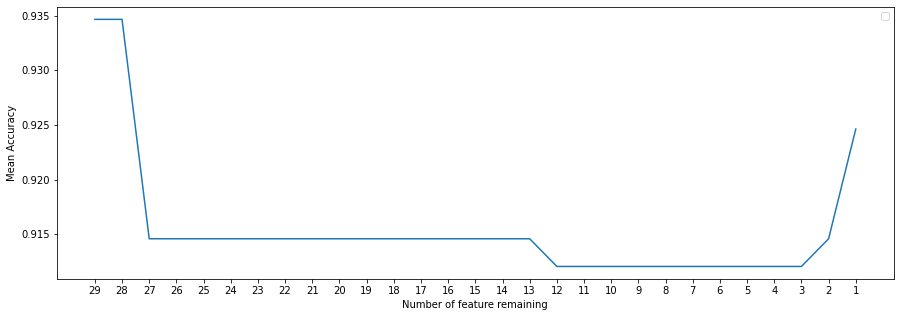

In [21]:
num_feature_remain1 = number_feature_remain(removed_features1)
plt.figure(figsize=(15, 5))
plt.plot(num_feature_remain1, valid_score_best1)
plt.xlabel('Number of feature remaining')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show 

Plot the best value of k (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features. [0.5]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

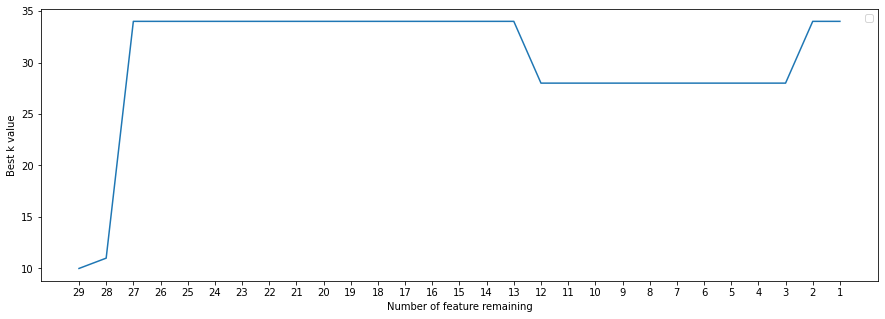

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(num_feature_remain1, k_best1)
plt.xlabel('Number of feature remaining')
plt.ylabel('Best k value')
plt.legend()
plt.show 

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


<function matplotlib.pyplot.show>

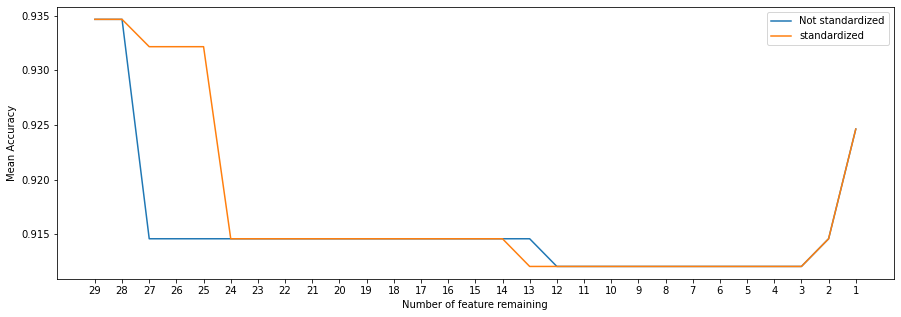

In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
data_standard = scaler.fit_transform(dataset.data)
df_standard = pd.DataFrame(data = data_standard, columns = dataset.feature_names)
df_standard['target'] = dataset.target
X_train, X_test, y_train, y_test = train_test_split(df_standard.loc[:,"mean radius":"worst fractal dimension"], df_standard["target"], test_size=0.3, random_state=0)

removed_features2, valid_score_best2, k_best2 = Feature_selector (X_train , y_train , tr=0.95)
num_feature_remain2 = number_feature_remain(removed_features2)

plt.figure(figsize=(15, 5))
plt.plot(num_feature_remain1, valid_score_best1)
plt.plot(num_feature_remain2, valid_score_best2)

plt.xlabel('Number of feature remaining')
plt.ylabel('Mean Accuracy')
plt.legend(["Not standardized", "standardized"])
plt.show 

Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)

The standardization make the average mean_validation_accuracy slightly larger. As we can see from the graph, the yellow curve is above the blue curve at most of the times.

The highest accuracy is 0.9346518987341772, number of feature is 28, and k is 10

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [36]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_standard.loc[:,"mean radius":"worst fractal dimension"], df_standard["target"], test_size=0.3, random_state=0)
X_train = X_train.drop(removed_features2[0:2], axis = 1)
X_test = X_test.drop(removed_features2[0:2], axis = 1)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test))
print(accuracy)

0.9473684210526315


The test set accuracy has a great value which is 0.9473684210526315. It's the highest accuracy among the cross validation accuracy. Therefore, the model has a great performance. 